# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [5]:
from __future__ import print_function, division

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

df = pd.read_csv('data/human_body_temperature.csv')

### Get mean, standard deviation, and size of people sample

In [6]:
avg_temp = df.temperature.mean()
temp_std = df.temperature.std()
samp_size = df.temperature.count()

Here I am creating a simple function, sdp "standard deviation percentage" to return the percent of the sample within 1, 2, and 3 z scores. Since we already know the sample size is large, if we see that the percentage of the sample with 1, 2, and 3 z scores of the mean is 69%, 94%, and 99% respectively, than we can safely say the distribution is normal

In [4]:
def sdp(z_score):
    more = avg_temp + (temp_std * z_score)
    less = avg_temp - (temp_std * z_score)
    temp_range = (df['temperature'] < more) & (df['temperature'] > less)
    
    count = df.loc[temp_range]['temperature'].count()
    
    return count/130

one_sdp = sdp(1)
two_sdp = sdp(2)
three_sdp = sdp(3)

'{} - {} - {}'.format(one_sdp, two_sdp, three_sdp)

'0.6923076923076923 - 0.9461538461538461 - 0.9923076923076923'

Answer 1) Yes the distribution of body temperatures is normal because the sample size is considered large, and the percent of the samples within 1, 2, and 3 standard deviations from the mean is about 69%, 95%, and 99.7%.

Answer 2) Yes anything above 30 observations can be considered large, and this has over 100.

### Estimate population standard deviation
To estimate the true population standard deviation, we must divide what we have, the sample standard deviation, by the square root of the sample size.

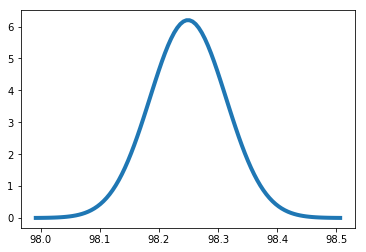

In [20]:
pop_std = temp_std/(samp_size**.5)

# Create distribution from data getting the mean, quartiles, min, max, and standard deviation
pop_dist = scipy.stats.norm(avg_temp, pop_std)

def eval_prob_dens_func(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

xs, ys = eval_pdf(pop_dist)
xst, yst = eval_pdf(pop_dist_t)
plt.plot(xs, ys, label='male', linewidth=4)
plt.show()

In [28]:
def summarize_sampling_distribution(sample_stats, z_score):
    z_score_value = sample_stats.std() * z_score
    print('SE', sample_stats.std())
    print('95% CI: {} - {}'.format(sample_stats.mean() - z_score_value, sample_stats.mean() + z_score_value))

summarize_sampling_distribution(pop_dist, 1.96)

# 98.123 - 98.375
# 98.118 - 98.380

SE 0.0643044168379
95% CI: 98.12319411222852 - 98.37526742623304


3A) After getting a 95% confidence interval for the mean of body temperatures from a true population of men and women, we can be 95% confident that average body temperatures lie somewhere between 98.12 and 98.38 degrees. Anything less or greater than that is considered insignificant for having a p-value less than 5%, so we can safely assume that the true body temperature average is highly unlikely to be 98.6%

3B) In this example, it is appropriate to use a Z-Statistic as the sample size is large enough where we don't need to use T-Statistcs. However, using T-Statistics don't give us a much different result, even when using 30 degrees of freedom on a T-Table as anything equal to or less than 30 samples is the threshold for when you should use T-Statistics.

4) Since we can safely say with 95% confidence that any sample randomly selected from the true population will be somewhere between 98.12 and 98.38 degrees, it should be considered 'Abnormal' that someone have an average body temperature above or below that. 

### Establish Null Hypothesis, and Start Getting Statistics of Male and Female Samples.

Null Hypothesis = Gender has no effect on body temperature

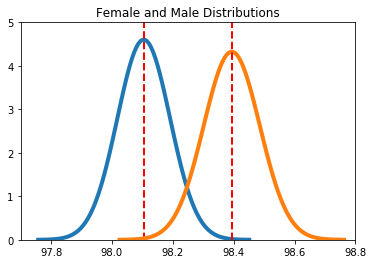

In [59]:
male_temps = df.loc[df['gender'] == 'M']
female_temps = df.loc[df['gender'] == 'F']

avg_fem = female_temps.temperature.mean()
pop_fem_std = female_temps.temperature.std()/female_temps['gender'].count()**.5

avg_male = male_temps.temperature.mean()
pop_male_std = male_temps.temperature.std()/male_temps['gender'].count()**.5

male_dist = scipy.stats.norm(avg_male, pop_mal_std)
female_dist = scipy.stats.norm(avg_fem, pop_fem_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

mxs, mys = eval_pdf(male_dist)
plt.plot(mxs, mys, label='male', linewidth=4)
plt.axvline(mxs.mean(), color='r', linestyle='dashed', linewidth=2)

fxs, fys = eval_pdf(female_dist)
plt.plot(fxs, fys, label='female', linewidth=4)
plt.title('Female and Male Distributions')
plt.axvline(fxs.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axis([97.7, 98.8, 0, 5])
plt.show()

Assuming our Null Hypothesis is correct, we will make the mean of our population distribution of the difference of body temperature between genders, the population male average. The standard deviation, since were getting the probability of the chance that a female's average body temperature is really .3 degrees hotter than males, we will get the z-score away from the mean by dividing the difference in male/female population averages and dividing it by the female population standard deviation.

In [60]:
mean_diff = (avg_fem - avg_male)

z_score = mean_diff/pop_fem_std
z_score

3.136370440145384

Answer 5A) The probability, or p-value, of a female's average body temperature being .4 degrees hotter than males, being completely chance is .08% meaning we must reject our null hypothesis, and assume that gender does in fact have an effect on body temperature.

Answer 5B) For this test I used a two tailed tests since the question only asks if there is 'any' effect on body temperatures by gender. It doesn't ask whether it is a positive or negative effect. 

Conclusion = With a normally distributed large sample of 130 men and women, we can conclude that the average body temperature is highly unlikely to be 98.6 degrees since with confidence we can say that 99% of any random person chosen from anywhere in the world will be between about 98.1, and 98.4 degrees. This also means that anyone with a body temperature under or above 98.1 to 98.4 degrees should be considered abnormal. There is a considerable difference between a man and a females average body temperatures however, ranging between about 2 degrees above and below a man's average body temperature.  